In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import lims_access as la

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
from allensdk.core.nwb_data_set import NwbDataSet
from allensdk_internal.core import lims_utilities as lims

%matplotlib inline

C:\anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
q = "select * from structures where acronym ilike '%%lgd%%' "
df = la.get_lims_dataframe(q)
df.head()

,blue,st_level,name,acronym,created_at,hemisphere_id,sibling_order,updated_at,green,ontology_id,st_order,id,red,atlas_id
0,85,NaN,dorsal lateral geneiculate nucleus,LGd,None,3,2,2013-06-17 19:45:07.707319,232,7,2,12922,169,NaN
1,85,NaN,"dorsal lateral geniculate nucleus, left",LGd,None,1,0,2013-06-17 19:45:07.714456,232,7,0,4440,169,4434.0
2,85,NaN,"dorsal lateral geniculate nucleus, left, magno...",LGdm,None,1,0,2013-06-17 19:45:07.721553,232,7,0,4441,169,4435.0
3,85,NaN,"dorsal lateral geniculate nucleus, left, parvo...",LGdp,None,1,1,2013-06-17 19:45:07.728695,232,7,1,4442,169,4436.0
4,85,NaN,"dorsal lateral geniculate nucleus, left, s and...",LGds,None,1,2,2013-06-17 19:45:07.735924,232,7,2,4443,169,4437.0


In [210]:
q = "select .feat*, err.*, specimens.name from well_known_files where storage_directory = '/allen/programs/celltypes/production/mousecelltypes/prod115/Ephys_Specimen_Roi_plan_313860731/'"

#df = la.get_lims_dataframe(q)
df

,published_at,workflow_state,created_at,updated_at,filename,storage_directory,file_source_id,attachable_type,content_type,well_known_file_type_id,attachable_id,id,size
0,None,None,2014-12-19 00:09:15.253529,2014-12-19 00:09:15.253529,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.pxp,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,application/octet-stream; charset=binary,305301981.0,313860731,313860875,1.703586e+09
1,None,None,2014-12-19 00:09:15.317495,2014-12-19 00:09:15.317495,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.40x.tif,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,image/tiff; charset=binary,305301983.0,313860731,313860877,2.895604e+06
2,None,None,2014-12-19 00:09:15.387782,2014-12-19 00:09:15.387782,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.40x_...,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,image/tiff; charset=binary,310980879.0,313860731,313860879,2.895604e+06
3,None,None,2014-12-19 00:09:15.457422,2014-12-19 00:09:15.457422,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.40x_...,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,image/tiff; charset=binary,310980881.0,313860731,313860881,2.895604e+06
4,None,None,2014-12-19 00:09:15.526415,2014-12-19 00:09:15.526415,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.4x.tif,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,image/tiff; charset=binary,306905520.0,313860731,313860883,2.895604e+06
5,None,None,2014-12-19 00:09:15.790135,2014-12-19 00:09:15.790135,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.h5,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,application/x-hdf; charset=binary,306905526.0,313860731,313860885,1.705480e+09
6,None,None,2015-07-08 13:45:04.730337,2015-07-08 13:45:04.753093,313860731_ephys_features.json,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,application/json,NaN,313860731,480630119,NaN
7,2015-05-14,None,2015-12-01 05:30:49.888165,2016-01-29 10:02:59.381861,ephys_inst_threshold.png,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,image/png; charset=binary,488673261.0,313860731,491382309,1.490000e+03
8,None,None,2015-01-30 06:08:00.279762,2015-01-30 06:08:00.292523,Rorb-IRES2-Cre-D;Ai14(IVSCC)-168047.01.02.orca,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,application/x-hdf; charset=binary,311813285.0,313860731,324318096,NaN
9,None,None,2015-04-29 03:05:51.153540,2015-04-29 03:05:51.184255,313860731.nwb,/allen/programs/celltypes/production/mousecell...,None,EphysRoiResult,application/x-hdf; charset=binary,475137571.0,313860731,475692870,NaN


In [ ]:
query = "WITH dendrite_type AS (SELECT sts.specimen_id, array_to_string (array_agg (DISTINCT tag.name), ' ') AS dendrite_type \
FROM specimen_tags_specimens sts JOIN specimen_tags tag ON sts.specimen_tag_id = tag.id \
WHERE tag.name IN ('dendrite type - spiny', 'dendrite type - NA', 'dendrite type - sparsely spiny', 'dendrite type - aspiny') \
GROUP BY sts.specimen_id) SELECT cell.name AS cell_name, layer.name AS cortex_layer, cell.cell_depth, cell.structure_id, cell.cortex_layer_id, \
err.blowout_mv, err.initial_access_resistance_mohm, err.input_access_resistance_ratio, \
err.input_resistance_mohm, err.seal_gohm, proj.name AS project_name, cre.name AS cre_pos, features.*, \
proj.code AS project_num, donors.name AS donor_name, struc.acronym, struc.name AS brain_structure, \
(CASE WHEN donors.organism_id = 2 THEN 'mouse' WHEN donors.organism_id = '1' THEN 'human' END) AS species, dt.dendrite_type \
FROM specimens cell JOIN projects proj ON cell.project_id = proj.id \
JOIN ephys_roi_results err ON cell.ephys_roi_result_id = err.id \
JOIN ephys_features features ON cell.id = features.specimen_id \
JOIN donors ON donors.id = cell.donor_id \
LEFT JOIN structures struc ON cell.structure_id = struc.id \
LEFT JOIN structures layer ON layer.id = cell.cortex_layer_id \
LEFT JOIN cell_reporters cre ON cre.id = cell.cell_reporter_id \
left join dendrite_type dt on cell.id = dt.specimen_id \
WHERE err.workflow_state = 'manual_passed'"


In [7]:
"""
short square sweep number
"""
query = "WITH dendrite_type AS (SELECT sts.specimen_id, array_to_string (array_agg (DISTINCT tag.name), ' ') AS dendrite_type \
FROM specimen_tags_specimens sts JOIN specimen_tags tag ON sts.specimen_tag_id = tag.id \
WHERE tag.name IN ('dendrite type - spiny', 'dendrite type - NA', 'dendrite type - sparsely spiny', 'dendrite type - aspiny') \
GROUP BY sts.specimen_id) SELECT cell.name AS cell_name, layer.name AS cortex_layer, cell.cell_depth, cell.structure_id, cell.cortex_layer_id, \
err.blowout_mv, err.initial_access_resistance_mohm, err.input_access_resistance_ratio, \
err.input_resistance_mohm, err.seal_gohm, proj.name AS project_name, cre.name AS cre_pos, features.*, \
proj.code AS project_num, donors.name AS donor_name, struc.acronym, struc.name AS brain_structure, \
(CASE WHEN donors.organism_id = 2 THEN 'mouse' WHEN donors.organism_id = '1' THEN 'human' END) AS species, \
dt.dendrite_type, files.storage_directory || '' || files.filename AS file_path, \
rheo.sweep_number as rheo_sweep_num, hero.sweep_number as hero_sweep_num \
FROM specimens cell JOIN projects proj ON cell.project_id = proj.id \
JOIN ephys_roi_results err ON cell.ephys_roi_result_id = err.id \
JOIN ephys_features features ON cell.id = features.specimen_id \
JOIN donors ON donors.id = cell.donor_id \
LEFT JOIN structures struc ON cell.structure_id = struc.id \
LEFT JOIN structures layer ON layer.id = cell.cortex_layer_id \
LEFT JOIN cell_reporters cre ON cre.id = cell.cell_reporter_id \
LEFT JOIN dendrite_type dt ON cell.id = dt.specimen_id \
LEFT JOIN well_known_files files ON files.attachable_id = err.id \
LEFT JOIN ephys_sweeps rheo ON cell.id = rheo.specimen_id \
LEFT JOIN ephys_sweeps hero ON cell.id = hero.specimen_id \
WHERE files.well_known_file_type_id = 475137571 \
AND rheo.id = features.rheobase_sweep_id \
AND hero.id = features.thumbnail_sweep_id \
AND struc.acronym ILIKE '%%LGD%%'"


df = la.get_lims_dataframe(query)
#df['file_path_safe'] = df['file_path'].apply(lambda x: lims.safe_system_path(x))
df.head()

,cell_depth,tau,upstroke_downstroke_ratio_short_square,thumbnail_sweep_id,has_delay,threshold_v_ramp,peak_v_short_square,upstroke_downstroke_ratio_ramp,sag,updated_at,...,fast_trough_v_long_square,brain_structure,upstroke_downstroke_ratio_long_square,f_i_curve_slope,cre_pos,project_num,trough_v_ramp,file_path,peak_v_long_square,adaptation
0,23.7,19.315820,1.844387,605689220,False,-39.015627,14.906250,2.053830,0.307800,2017-07-31 22:59:50.480869,...,-51.312504,Dorsal part of the lateral geniculate complex,1.977068,-0.004264,negative,T301x,-49.187504,/allen/programs/celltypes/production/mousecell...,8.031250,NaN
1,35.6,23.196731,1.887427,605697589,False,-38.453127,14.312500,2.081108,0.396950,2017-07-31 23:44:53.512257,...,-51.968754,Dorsal part of the lateral geniculate complex,1.865673,0.020755,negative,T301x,-49.718754,/allen/programs/celltypes/production/mousecell...,13.843751,0.142169
2,39.1,23.330067,1.908740,605697433,False,-37.562504,14.148438,1.991314,0.533054,2017-07-31 23:44:51.271293,...,-51.250004,Dorsal part of the lateral geniculate complex,1.938847,0.006457,negative,T301x,-49.421877,/allen/programs/celltypes/production/mousecell...,17.250002,0.104651
3,29.0,13.778531,1.651942,606983629,False,-42.177085,18.062501,1.704702,0.499075,2017-08-08 23:40:03.913034,...,-55.562504,Dorsal part of the lateral geniculate complex,1.748242,0.711765,negative,T301x,-60.635418,/allen/programs/celltypes/production/mousecell...,24.343752,0.109005
4,33.4,18.743862,1.681246,605897056,False,-32.593754,27.593751,2.002516,0.553609,2017-08-01 22:17:58.185241,...,-49.218750,Dorsal part of the lateral geniculate complex,1.659539,0.012996,negative,T301x,-45.093754,/allen/programs/celltypes/production/mousecell...,25.812502,NaN


In [8]:
len(df)

275

In [230]:
q = 'select * from ephys_sweeps limit 10'

df = la.get_lims_dataframe(q)

df.columns

Index([u'stimulus_interval', u'updated_at', u'num_spikes', u'id', u'pre_vm_mv',
       u'stimulus_duration', u'stimulus_start_time', u'slow_noise_rms_mv',
       u'stimulus_amplitude', u'peak_deflection', u'bridge_balance_mohm',
       u'stimulus_units', u'workflow_state', u'specimen_id', u'sweep_number',
       u'vm_delta_mv', u'leak_pa', u'pre_noise_rms_mv', u'ephys_stimulus_id',
       u'post_noise_rms_mv', u'post_vm_mv', u'created_at', u'slow_vm_mv'],
      dtype='object')

In [255]:
ds = NwbDataSet(df['file_path_safe'][10])
sweep = ds.get_sweep(df['rheo_sweep_num'][10])

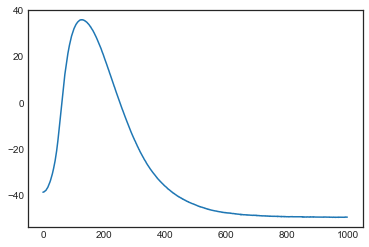

In [267]:
v = rheo_spike
t = np.arange(0,len(v))
plt.plot(t,v)

In [259]:
ds = NwbDataSet(df['file_path_safe'][0])
sweep = ds.get_sweep(df['rheo_sweep_num'][0])
spike_times = ds.get_spike_times(df['rheo_sweep_num'][0])
spike_times

array([1.4984, 1.8152])

 ...]

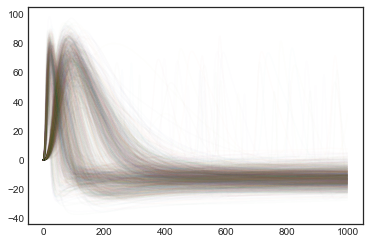

In [295]:
plt.plot(rheo_array[:1590].T, alpha = .01)

In [183]:
df = df.sort_values(['species', 'dendrite_type'], axis = 0)

In [223]:
df.columns

Index([u'cell_depth', u'tau', u'upstroke_downstroke_ratio_short_square',
       u'thumbnail_sweep_id', u'has_delay', u'threshold_v_ramp',
       u'peak_v_short_square', u'upstroke_downstroke_ratio_ramp', u'sag',
       u'updated_at', u'threshold_t_long_square', u'avg_isi',
       u'threshold_t_ramp', u'slow_trough_v_ramp', u'vrest', u'has_pause',
       u'trough_t_ramp', u'trough_v_long_square', u'input_resistance_mohm',
       u'rheobase_sweep_id', u'trough_t_short_square', u'species',
       u'fast_trough_v_ramp', u'trough_t_long_square', u'blowout_mv',
       u'threshold_v_long_square', u'slow_trough_v_long_square', u'id',
       u'peak_t_ramp', u'threshold_t_short_square', u'has_burst',
       u'slow_trough_t_long_square', u'input_access_resistance_ratio',
       u'fast_trough_t_long_square', u'ri', u'cortex_layer_id',
       u'threshold_v_short_square', u'structure_id', u'project_name',
       u'vm_for_sag', u'acronym', u'specimen_id', u'threshold_i_long_square',
       u'threshol

In [185]:
data_columns = [
    #'tau',
    'upstroke_downstroke_ratio_short_square',
    #'threshold_v_ramp',
    'peak_v_short_square',
    'upstroke_downstroke_ratio_ramp',
    #'sag',
    'threshold_t_long_square',
    #'avg_isi',
    #'threshold_t_ramp',
    'slow_trough_v_ramp',
    #'vrest',
    'trough_t_ramp',
    #'trough_v_long_square',
    'input_resistance_mohm',
    #'trough_t_short_square',
    #'fast_trough_v_ramp',
    'trough_t_long_square',
    #'threshold_v_long_square',
    #'slow_trough_v_long_square',
    'peak_t_ramp',
    #'threshold_t_short_square',
    #'slow_trough_t_long_square',
    'input_access_resistance_ratio',
    'fast_trough_t_long_square',
    'ri',
    #'threshold_v_short_square',
    'vm_for_sag',
    #'threshold_i_long_square',
    #'threshold_i_short_square',
    'slow_trough_t_ramp',
    'peak_v_ramp',
    'fast_trough_v_short_square',
    #'fast_trough_t_short_square',
    'fast_trough_t_ramp',
    #'initial_access_resistance_mohm',
    #'threshold_i_ramp',
    #'slow_trough_v_short_square',
    #'peak_t_short_square',
    #'slow_trough_t_short_square',
    #'trough_v_short_square',
    'peak_t_long_square',
    #'latency',
    #'fast_trough_v_long_square',
    'upstroke_downstroke_ratio_long_square',
    'f_i_curve_slope',
    #'trough_v_ramp',
    'peak_v_long_square',
    'adaptation'   
]

In [186]:
ephys_features = df[[column for column in data_columns]]
ephys_features = ephys_features.fillna(value=0)

X = ephys_features.as_matrix(columns = None)

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=3)
X_r = pca.fit(scaled_data).transform(scaled_data)

print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first three components): [0.3065132  0.22317418 0.16803332]


In [187]:
PCA_df = df
PCA_df['pca_1'] = X_r[:,0]
PCA_df['pca_2'] = X_r[:,1]

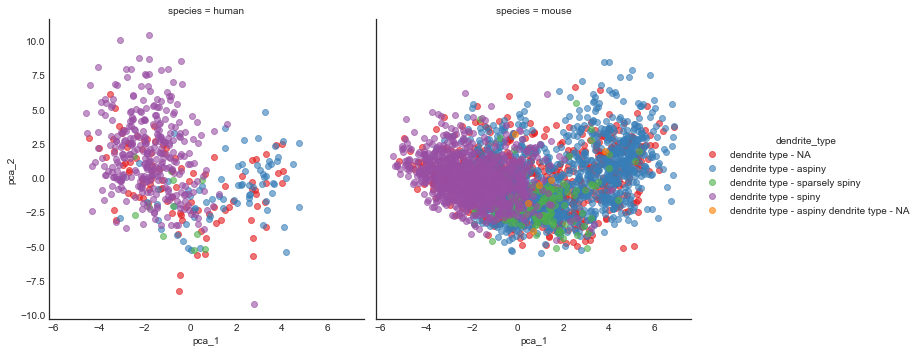

In [188]:
sns.set_style('white')
sns.lmplot(x='pca_1',y='pca_2', hue = 'dendrite_type',
           data = PCA_df, col = 'species',
           palette = sns.color_palette('Set1',5),
           fit_reg=False,scatter_kws={'alpha':0.6})

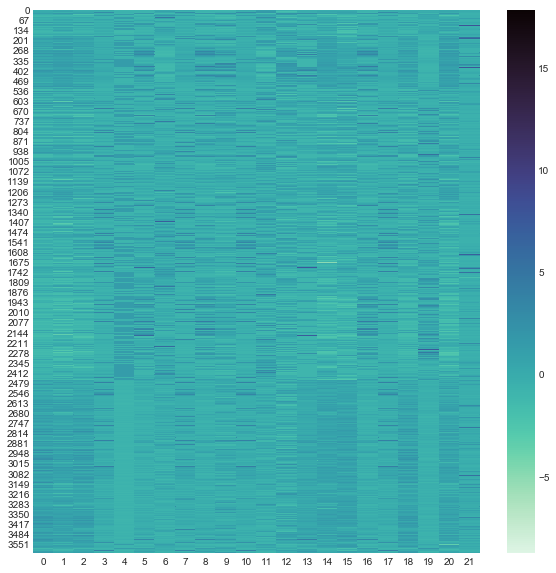

In [189]:
plt.figure(figsize = (10,10))
sns.heatmap(scaled_data, cmap = "mako_r")
#plt.xticks(np.arange(0,len(data_columns)),data_columns, rotation = 90)

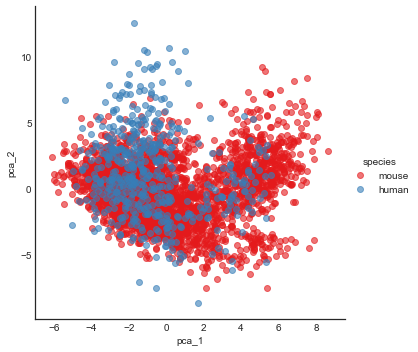

In [147]:
sns.set_style('white')
sns.lmplot(x='pca_1',y='pca_2', hue = 'species',
           data = PCA_df,
           palette = sns.color_palette('Set1',3),
           fit_reg=False,scatter_kws={'alpha':0.6})

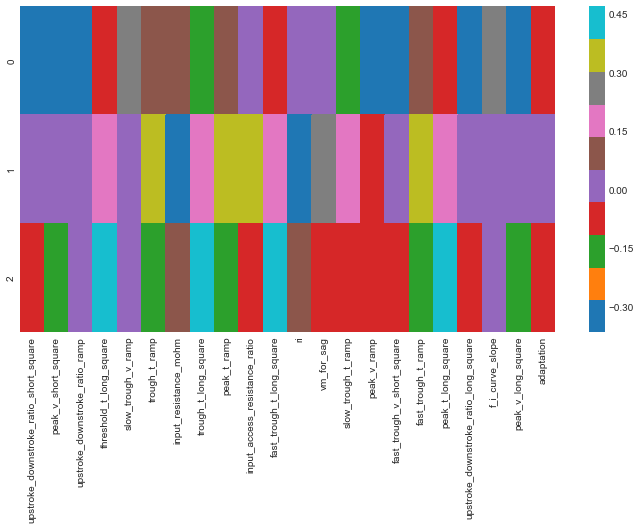

In [184]:
df_comp = pd.DataFrame(pca.components_,columns=ephys_features.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='tab10',)

In [141]:
dic = 

Index([u'tau', u'upstroke_downstroke_ratio_short_square', u'threshold_v_ramp',
       u'peak_v_short_square', u'upstroke_downstroke_ratio_ramp', u'sag',
       u'threshold_t_long_square', u'avg_isi', u'threshold_t_ramp',
       u'slow_trough_v_ramp', u'vrest', u'trough_t_ramp',
       u'trough_v_long_square', u'input_resistance_mohm',
       u'trough_t_short_square', u'fast_trough_v_ramp',
       u'trough_t_long_square', u'threshold_v_long_square',
       u'slow_trough_v_long_square', u'peak_t_ramp',
       u'threshold_t_short_square', u'slow_trough_t_long_square',
       u'input_access_resistance_ratio', u'fast_trough_t_long_square', u'ri',
       u'threshold_v_short_square', u'vm_for_sag', u'threshold_i_long_square',
       u'threshold_i_short_square', u'slow_trough_t_ramp', u'peak_v_ramp',
       u'fast_trough_v_short_square', u'fast_trough_t_short_square',
       u'fast_trough_t_ramp', u'initial_access_resistance_mohm',
       u'threshold_i_ramp', u'slow_trough_v_short_square',
   

In [304]:
s=0

rheo_array = np.empty((len(df),1000))
hero_array = np.empty((len(df),1000))

for i in range(len(df)):
    ds=NwbDataSet(df['file_path_safe'][i])
    sweep = ds.get_sweep(df['rheo_sweep_num'][i])
    sweep_i = np.copy(sweep['response']) *1e3
    sampling_rate = sweep['sampling_rate']
    spike_times = ds.get_spike_times(df['rheo_sweep_num'][i])
    sweep_i1=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
    rheo_array[s,:] = sweep_i1 - sweep_i1[0]
    
    sweep = ds.get_sweep(df['hero_sweep_num'][i])
    sweep_i = np.copy(sweep['response']) *1e3
    sampling_rate = sweep['sampling_rate']
    spike_times = ds.get_spike_times(df['hero_sweep_num'][i])
    sweep_i2=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
    hero_array[s,:] = sweep_i2 - sweep_i2[0]
    s += 1
    #print s

In [305]:
X = rheo_array.T

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=5)
X_r = pca.fit(scaled_data).transform(scaled_data)

print('explained variance ratio (first five components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first five components): [0.61129205 0.26656002 0.05797277 0.0299881  0.00609089]


In [308]:
X = hero_array.T

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=5)
X_r = pca.fit(scaled_data).transform(scaled_data)

print('explained variance ratio (first five components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first five components): [0.52909546 0.26932751 0.05526739 0.02444024 0.01230089]


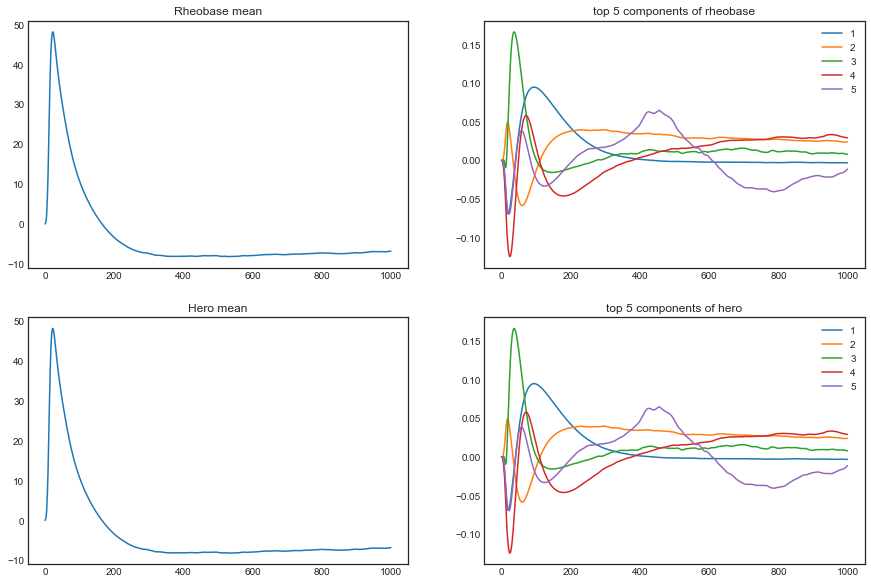

In [313]:

data_h = hero_array
data_r = rheo_array

pca_h = PCA(10)
pca_h.fit(data_h)
data_h = hero_array
pca_r = PCA(10)
pca_r.fit(data_r)
decomp_r = pca_r.fit_transform(data)
decomp_h = pca_h.fit_transform(data)
sigma = np.sqrt(pca_r.explained_variance_)

f,((ax1,ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
ax1.set_title('Rheobase mean')
ax2.set_title('top 5 components of rheobase')
ax1.plot(pca_r.mean_)
ax2.plot(pca_r.components_[0:5].T)
ax2.legend(['1','2','3','4','5'])

ax3.set_title('Hero mean')
ax4.set_title('top 5 components of hero')
ax3.plot(pca_h.mean_)
ax4.plot(pca_h.components_[0:5].T)
ax4.legend(['1','2','3','4','5'])
#plt.savefig('PCA_graph_1.png')

 ...]

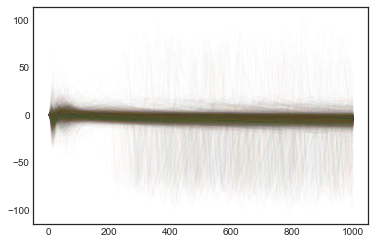

In [307]:
diff = rheo_array.T - hero_array.T
plt.plot(diff, alpha = .01)

In [319]:
PCA_df['Rheo_PCA_1'] = decomp_r[:,0]
PCA_df['Rheo_PCA_2'] = decomp_r[:,1]
PCA_df['Hero_PCA_1'] = decomp_h[:,0]
PCA_df['Hero_PCA_2'] = decomp_h[:,1]


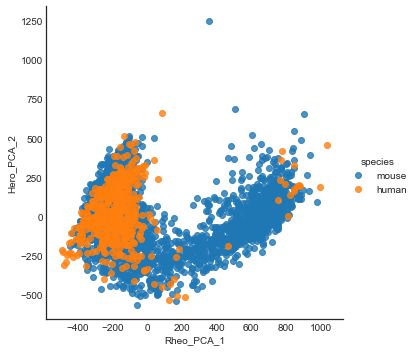

In [317]:
sns.lmplot('Rheo_PCA_1', 'Hero_PCA_2', data = df, fit_reg = False, hue = 'species')

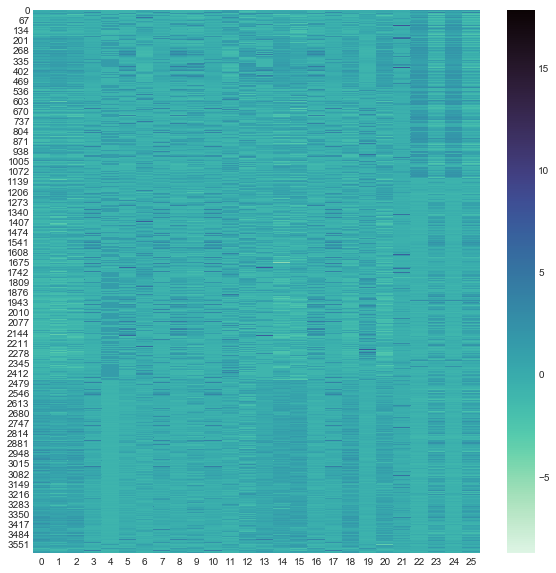

In [325]:
"""ephys_features['Rheo_PCA_1'] = decomp_r[:,0]
ephys_features['Rheo_PCA_2'] = decomp_r[:,1]
ephys_features['Hero_PCA_1'] = decomp_h[:,0]
ephys_features['Hero_PCA_2'] = decomp_h[:,1]
X = ephys_features.as_matrix(columns = None)

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
"""
plt.figure(figsize = (10,10))
sns.heatmap(scaled_data, cmap = "mako_r")